In [134]:
# Dependencies

import pandas as pd
import numpy as np
import pylab as plt
from sklearn.decomposition import PCA
from pprint import pprint
from datetime import datetime
!pip install wbdata
import wbdata
import matplotlib.pyplot as plt


In [135]:
wbdata.get_source(2)

2	World Development Indicators


In [136]:
wbdata.search_indicators('emission', source=2)

EN.ATM.CO2E.GF.KT   	CO2 emissions from gaseous fuel consumption (kt) 
EN.ATM.CO2E.GF.ZS   	CO2 emissions from gaseous fuel consumption (% of total) 
EN.ATM.CO2E.KD.GD   	CO2 emissions (kg per 2010 US$ of GDP)
EN.ATM.CO2E.KT      	CO2 emissions (kt)
EN.ATM.CO2E.LF.KT   	CO2 emissions from liquid fuel consumption (kt) 
EN.ATM.CO2E.LF.ZS   	CO2 emissions from liquid fuel consumption (% of total) 
EN.ATM.CO2E.PC      	CO2 emissions (metric tons per capita)
EN.ATM.CO2E.PP.GD   	CO2 emissions (kg per PPP $ of GDP)
EN.ATM.CO2E.PP.GD.KD	CO2 emissions (kg per 2011 PPP $ of GDP)
EN.ATM.CO2E.SF.KT   	CO2 emissions from solid fuel consumption (kt) 
EN.ATM.CO2E.SF.ZS   	CO2 emissions from solid fuel consumption (% of total)
EN.ATM.GHGO.KT.CE   	Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)
EN.ATM.GHGO.ZG      	Other greenhouse gas emissions (% change from 1990)
EN.ATM.GHGT.KT.CE   	Total greenhouse gas emissions (kt of CO2 equivalent)
EN.ATM.GHGT.ZG     

In [137]:
co2_pc = wbdata.get_indicator('EN.ATM.CO2E.PC', display=False)
pprint(co2_pc)

[{'id': 'EN.ATM.CO2E.PC',
  'name': 'CO2 emissions (metric tons per capita)',
  'source': {'id': '2', 'value': 'World Development Indicators'},
  'sourceNote': 'Carbon dioxide emissions are those stemming from the burning '
                'of fossil fuels and the manufacture of cement. They include '
                'carbon dioxide produced during consumption of solid, liquid, '
                'and gas fuels and gas flaring.',
  'sourceOrganization': 'Carbon Dioxide Information Analysis Center, '
                        'Environmental Sciences Division, Oak Ridge National '
                        'Laboratory, Tennessee, United States.',
  'topics': [{'id': '19', 'value': 'Climate Change'},
             {'id': '6', 'value': 'Environment '}]}]


In [138]:
country_codes = []

country_codes.append(wbdata.search_countries("United States"))
country_codes.append(wbdata.search_countries("United Kingdom"))
country_codes.append(wbdata.search_countries("Japan"))
country_codes.append(wbdata.search_countries("Mexico"))
country_codes.append(wbdata.search_countries("India"))
country_codes.append(wbdata.search_countries("China"))



USA	United States
GBR	United Kingdom
JPN	Japan
MEX	Mexico
IND	India
CHN	China
HKG	Hong Kong SAR, China
MAC	Macao SAR, China
TWN	Taiwan, China


In [139]:
import datetime
data_dates = (datetime.datetime(1960,1,1), datetime.datetime(2015,1,1))

In [227]:
country_list = ["USA","GBR","JPN","MEX","IND","CHN"]
data = wbdata.get_dataframe({'EN.ATM.CO2E.PC':'values'}, 
                            country=country_list, 
                            data_date=data_dates, 
                            convert_date=False, keep_levels=True)

data = data.reset_index()
#data = data.fillna(0)
data.head()

,country,date,values
0,China,2015,NaN
1,China,2014,7.543908
2,China,2013,7.557211
3,China,2012,7.424751
4,China,2011,7.241515


In [228]:
chn_df = pd.DataFrame(data[data["country"]=="China"])
chn_df = chn_df.sort_values(by="date",ascending=True)
chn_df.set_index("date", drop=True, inplace=True)

mex_df = pd.DataFrame(data[data["country"]=="Mexico"])
mex_df = mex_df.sort_values(by="date",ascending=True)
mex_df.set_index("date", drop=True, inplace=True)

ind_df = pd.DataFrame(data[data["country"]=="India"])
ind_df = ind_df.sort_values(by="date",ascending=True)
ind_df.set_index("date", drop=True, inplace=True)

usa_df = pd.DataFrame(data[data["country"]=="United States"])
usa_df = usa_df.sort_values(by="date",ascending=True)
usa_df.set_index("date", drop=True, inplace=True)

gpb_df = pd.DataFrame(data[data["country"]=="United Kingdom"])
gpb_df = gpb_df.sort_values(by="date",ascending=True)
gpb_df.set_index("date", drop=True, inplace=True)

jpn_df = pd.DataFrame(data[data["country"]=="Japan"])
jpn_df = jpn_df.sort_values(by="date",ascending=True)
jpn_df.set_index("date", drop=True, inplace=True)

chn_df.head()

,country,values
date,,
1960,China,1.170381
1961,China,0.836047
1962,China,0.661428
1963,China,0.640002
1964,China,0.625646


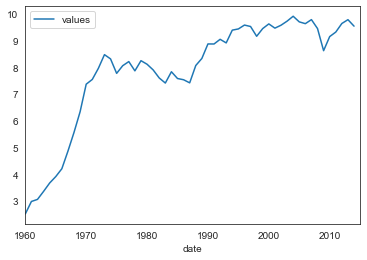

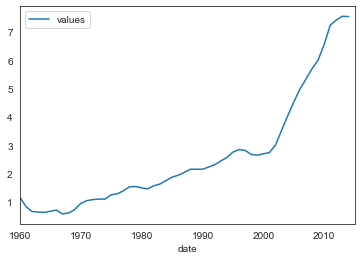

In [229]:
jpn_df.plot()
chn_df.plot()

data = pd.read_csv("../Resources/Indicators.csv")

data.head()

gdp_us = data[data["IndicatorName"]=="GDP per capita (current US$)"]

gdp_us = gdp_us[gdp_us["CountryName"]=="United States"]

gdp_us.head()

country_list = ["United States","United Kingdom","Japan","China","India","Mexico"]

country_df = pd.DataFrame({"Country":country_list})

country_df.head()

co2_us = data[data["IndicatorName"]=="CO2 emissions (metric tons per capita)"]

co2_us = co2_us[co2_us["CountryName"].isin(country_df["Country"])]

co2_us.head(6)

x_axis = pd.DataFrame(co2_us["Year"].unique(),columns = "Year")
x_axis.head()

x_axis = co2_us["Year"].unique
y_axis = co2_us["Value"]

co2_us.plot(kind="line")